In [145]:
import numpy as np
import sys
import os
import string

# used for python 2
#import StringIO

# replaced for python3
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO,BytesIO


#-------------------------------------------    
def unicode(bytedata):
    udata = bytedata.decode('UTF-8')
    return udata
#-----------------------------------------------

In [146]:
from os import listdir
from os.path import isfile, join

In [147]:
def fixHeaders(instr):
    """
    Modifies the column header string to be compatible with numpy column lookup.
  
    Args:
        | list columns (string): column name.
  
  
    Returns:
        | list columns (string): fixed column name.
  
    Raises:
        | No exception is raised.
    """
  
    intab = u"+-[]@"
    outtab = u"pmbba"              # python2
    #outtab=bytearray(b"pmbba")      # python3
  
    #if isinstance(instr, unicode):
    #    translate_table = dict((ord(char), unicode(outtab)) for char in intab)
    #else:
    #    assert isinstance(instr, str)
    #    translate_table = str.maketrans(intab, outtab)
    #return instr.translate(translate_table)

    #translate_table = dict((ord(char), unicode(outtab)) for char in intab)
    
    translate_table = str.maketrans(intab, outtab)
    return instr.translate(translate_table)

In [148]:
#------------------------------------------------------------------------------  
def fixHeadersList(headcol):
    """
    Modifies the column headers to be compatible with numpy column lookup.
  
    Args:
        | list columns ([string]): list of column names.
  
  
    Returns:
        | list columns ([string]): fixed list of column names.
  
    Raises:
        | No exception is raised.
    """
  
    headcol = [fixHeaders(str) for str in headcol]
    return headcol
#--------------------------------------------------------------------------------

# character code translation

In [149]:
#intab = u"+-[]@"
#outtab = u"pmbba"

intab = u"+-[]@"
#outtab = u"pmbba"              # python2
outtab=bytearray(b"pmbba")      # python3
  

In [150]:
intab = u"+-[]@"
outtab = u"pmbba"
translate_table = str.maketrans(intab, outtab)

In [151]:
translate_table

{43: 112, 45: 109, 91: 98, 93: 98, 64: 97}

In [152]:
intab = u"+-[]@"
#outtab = u"pmbba"              # python2
outtab=bytearray(b"pmbba")      # python3

In [153]:
unicode(outtab)

'pmbba'

In [154]:
#translate_table = dict((ord(char), unicode(char)) for char in intab)

In [155]:
translate_table

{43: 112, 45: 109, 91: 98, 93: 98, 64: 97}

In [156]:
path_data='modtrandata/Jul6th2018'

In [157]:
! pwd

/pbs/throng/lsst/users/dagoret/lsst_sims/sims_maf_contrib/ModtranLibRadTranComp


In [158]:
files_data = [f for f in listdir(path_data) if isfile(join(path_data, f))]

In [159]:
files_data.sort()

In [160]:
files_selected=[]
for file in files_data:
    if file.find("_reduced")==-1:
        print("reject ",file)
    else:
        files_selected.append(file)
        

reject  Pachon_MODTRAN.10.7sc
reject  Pachon_MODTRAN.11.7sc
reject  Pachon_MODTRAN.12.7sc
reject  Pachon_MODTRAN.13.7sc
reject  Pachon_MODTRAN.14.7sc
reject  Pachon_MODTRAN.15.txt
reject  Pachon_MODTRAN.16.7sc
reject  Pachon_MODTRAN.17.7sc
reject  Pachon_MODTRAN.18.7sc
reject  Pachon_MODTRAN.19.7sc
reject  Pachon_MODTRAN.20.7sc
reject  Pachon_MODTRAN.21.7sc
reject  Pachon_MODTRAN.22.7sc
reject  Pachon_MODTRAN.23.7sc
reject  Pachon_MODTRAN.25.7sc
reject  Pachon_MODTRAN.7sc


In [161]:
files_selected.sort()

In [162]:
file=files_selected[0]

In [163]:
fullfilename=os.path.join(path_data,file)

In [164]:
filename=fullfilename

In [165]:
infile = open(filename, 'r')   

In [166]:
idata = {}
lines = infile.readlines()#.strip()
infile.close()

In [167]:
IEMSCT = 0

In [168]:
lines

['   361976 U S STANDARD\n',
 '   2.70000 100.00000   0.00000  97.30000   0.00000   0.00000    0\n',
 '  WAVELENGTH COMBIN    H2O   UMIX     O3  TRACE     N2    H2O MOLEC AER+CLD  HNO3 AER+CLD\n',
 '        (NM)  TRANS  TRANS  TRANS  TRANS  TRANS   CONT   CONT   SCAT  TRANS  TRANS abTRNS\n',
 '     250.000 0.0000 1.0000 0.2169 0.0000 0.9997 1.0000 1.0000 0.1419 1.0000 1.0000 1.0000\n',
 '     251.000 0.0000 1.0000 0.2566 0.0000 0.9997 1.0000 1.0000 0.1469 1.0000 1.0000 1.0000\n',
 '     252.000 0.0000 1.0000 0.2988 0.0000 0.9997 1.0000 1.0000 0.1520 1.0000 1.0000 1.0000\n',
 '     253.000 0.0000 1.0000 0.3429 0.0000 0.9997 1.0000 1.0000 0.1571 1.0000 1.0000 1.0000\n',
 '     254.000 0.0000 1.0000 0.3880 0.0000 0.9997 1.0000 1.0000 0.1623 1.0000 1.0000 1.0000\n',
 '     255.000 0.0000 1.0000 0.4337 0.0000 0.9996 1.0000 1.0000 0.1675 1.0000 1.0000 1.0000\n',
 '     256.000 0.0000 1.0000 0.4791 0.0000 0.9997 1.0000 1.0000 0.1728 1.0000 1.0000 1.0000\n',
 '     257.000 0.0000 1.0000 0.5239

In [169]:
headline = 0
while lines[headline].find('WAVELENGTH') < 0:
    headline = headline + 1

In [170]:
headline

2

In [171]:
#some files has only a single text column head, while others have two
# find out what the case is for this file and concatenate if necessary
colHead1st = lines[headline].split()
colHead2nd = lines[headline+1].split()
if colHead2nd[0].find('NM') >= 0:
    colHead = [h1+'_'+h2 for (h1,h2) in zip(colHead1st,colHead2nd)]
    deltaHead = 1
else:
    colHead = colHead1st
    deltaHead = 0

In [172]:
deltaHead

1

In [173]:
colHead

['WAVELENGTH_(NM)',
 'COMBIN_TRANS',
 'H2O_TRANS',
 'UMIX_TRANS',
 'O3_TRANS',
 'TRACE_TRANS',
 'N2_CONT',
 'H2O_CONT',
 'MOLEC_SCAT',
 'AER+CLD_TRANS',
 'HNO3_TRANS',
 'AER+CLD_abTRNS']

In [174]:
if IEMSCT == 1:
    removeIEMSCT1 = ['SOL_SCAT', 'SING_SCAT', 'DRCT_RFLT', 'REF_SOL', 'SOL@OBS', 'TOA_SUN']
    colHead = [x for x in colHead if x not in removeIEMSCT1]
  
if IEMSCT == 3:
    colHead = ['FREQ', 'TRANS', 'SOL_TR', 'SOLAR', 'DEPTH']

In [175]:
colHead = fixHeadersList(colHead)

In [176]:
colHead

['WAVELENGTH_(NM)',
 'COMBIN_TRANS',
 'H2O_TRANS',
 'UMIX_TRANS',
 'O3_TRANS',
 'TRACE_TRANS',
 'N2_CONT',
 'H2O_CONT',
 'MOLEC_SCAT',
 'AERpCLD_TRANS',
 'HNO3_TRANS',
 'AERpCLD_abTRNS']

In [177]:
colHeadNames=",".join(colHead)

In [178]:
colHeadNames

'WAVELENGTH_(NM),COMBIN_TRANS,H2O_TRANS,UMIX_TRANS,O3_TRANS,TRACE_TRANS,N2_CONT,H2O_CONT,MOLEC_SCAT,AERpCLD_TRANS,HNO3_TRANS,AERpCLD_abTRNS'

In [179]:
#s = " ".join(colHead) + '\n'
# now append the numeric data, ignore the original header and last row in the file
#s = s + " ".join(lines[headline+1+deltaHead:-1])
  
s = " ".join(lines[headline+1+deltaHead:-1])

In [180]:
s

'     250.000 0.0000 1.0000 0.2169 0.0000 0.9997 1.0000 1.0000 0.1419 1.0000 1.0000 1.0000\n      251.000 0.0000 1.0000 0.2566 0.0000 0.9997 1.0000 1.0000 0.1469 1.0000 1.0000 1.0000\n      252.000 0.0000 1.0000 0.2988 0.0000 0.9997 1.0000 1.0000 0.1520 1.0000 1.0000 1.0000\n      253.000 0.0000 1.0000 0.3429 0.0000 0.9997 1.0000 1.0000 0.1571 1.0000 1.0000 1.0000\n      254.000 0.0000 1.0000 0.3880 0.0000 0.9997 1.0000 1.0000 0.1623 1.0000 1.0000 1.0000\n      255.000 0.0000 1.0000 0.4337 0.0000 0.9996 1.0000 1.0000 0.1675 1.0000 1.0000 1.0000\n      256.000 0.0000 1.0000 0.4791 0.0000 0.9997 1.0000 1.0000 0.1728 1.0000 1.0000 1.0000\n      257.000 0.0000 1.0000 0.5239 0.0000 0.9996 1.0000 1.0000 0.1781 1.0000 1.0000 1.0000\n      258.000 0.0000 1.0000 0.5675 0.0000 0.9996 1.0000 1.0000 0.1835 1.0000 1.0000 1.0000\n      259.000 0.0000 1.0000 0.6093 0.0000 0.9995 1.0000 1.0000 0.1889 1.0000 1.0000 1.0000\n      260.000 0.0000 1.0000 0.6493 0.0000 0.9995 1.0000 1.0000 0.1943 1.0000 1.0

In [181]:
dsfdqsqdsf

NameError: name 'dsfdqsqdsf' is not defined

In [182]:
type(s)

str

In [183]:
#read the string in from a StringIO in-memory file
#lines = np.ndfromtxt(StringIO(s), dtype=None,  names=True)

#lines=np.genfromtxt(StringIO(s), dtype=None,names=colHeadNames)
  
lines=np.genfromtxt(BytesIO(s.encode()),names=colHeadNames)

In [184]:
lines

array([ (  250.,   0.00000000e+00,  1.    ,  0.2169,   0.00000000e+00,  0.9997,  1.,  1.    ,  0.1419,  1.,  1.,  1.),
       (  251.,   0.00000000e+00,  1.    ,  0.2566,   0.00000000e+00,  0.9997,  1.,  1.    ,  0.1469,  1.,  1.,  1.),
       (  252.,   0.00000000e+00,  1.    ,  0.2988,   0.00000000e+00,  0.9997,  1.,  1.    ,  0.152 ,  1.,  1.,  1.),
       (  253.,   0.00000000e+00,  1.    ,  0.3429,   0.00000000e+00,  0.9997,  1.,  1.    ,  0.1571,  1.,  1.,  1.),
       (  254.,   0.00000000e+00,  1.    ,  0.388 ,   0.00000000e+00,  0.9997,  1.,  1.    ,  0.1623,  1.,  1.,  1.),
       (  255.,   0.00000000e+00,  1.    ,  0.4337,   0.00000000e+00,  0.9996,  1.,  1.    ,  0.1675,  1.,  1.,  1.),
       (  256.,   0.00000000e+00,  1.    ,  0.4791,   0.00000000e+00,  0.9997,  1.,  1.    ,  0.1728,  1.,  1.,  1.),
       (  257.,   0.00000000e+00,  1.    ,  0.5239,   0.00000000e+00,  0.9996,  1.,  1.    ,  0.1781,  1.,  1.,  1.),
       (  258.,   0.00000000e+00,  1.    ,  0.5675,   0

In [185]:
lines.shape

(850,)

In [ ]:
coldata= lines.reshape(-1, 1)

In [ ]:
coldata.shape

In [186]:
colspec = ['WAVELENGTH_NM','COMBIN_TRANS']

In [187]:
#extract the wavenumber col as the first column in the new table
coldata= lines[fixHeaders(colspec[0])].reshape(-1, 1)
# then append the other required columns
for colname in colspec[1:]:
    coldata = np.hstack((coldata, lines[fixHeaders(colname)].reshape(-1, 1)))

In [188]:
coldata

array([[  2.50000000e+02,   0.00000000e+00],
       [  2.51000000e+02,   0.00000000e+00],
       [  2.52000000e+02,   0.00000000e+00],
       ..., 
       [  1.09700000e+03,   9.82200000e-01],
       [  1.09800000e+03,   9.69500000e-01],
       [  1.09900000e+03,   9.59800000e-01]])

In [189]:
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline

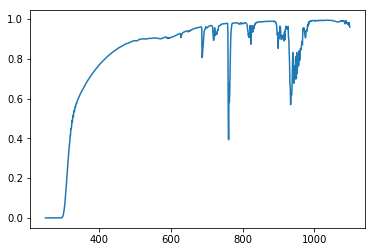

In [191]:
plt.plot(coldata[:,0],coldata[:,1])